In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_03_T1134_ABALONE_15kV_SiPM2_32V_LED500V.dat Number of events 595119.0
Total events number: 595119
event n. 0 time to process: 0.02
event n. 100000 time to process: 15.21
event n. 200000 time to process: 29.60
event n. 300000 time to process: 44.27
event n. 400000 time to process: 58.89
event n. 500000 time to process: 73.01


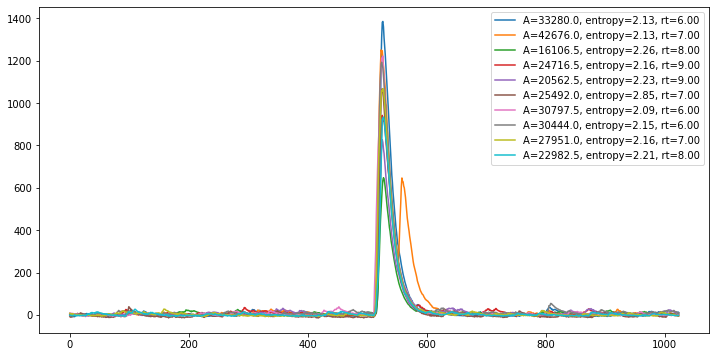

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_03_T1134_ABALONE_15kV_SiPM2_32V_LED500V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,w=10)

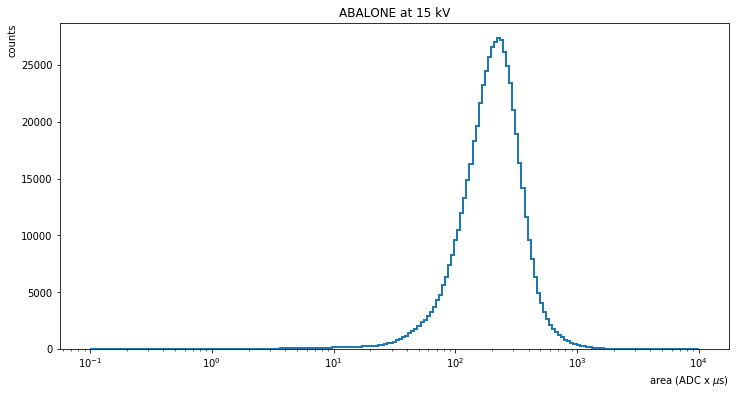

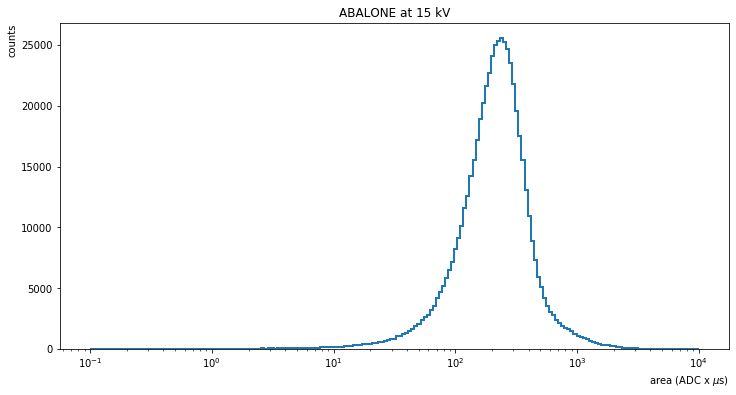

<Figure size 864x432 with 0 Axes>

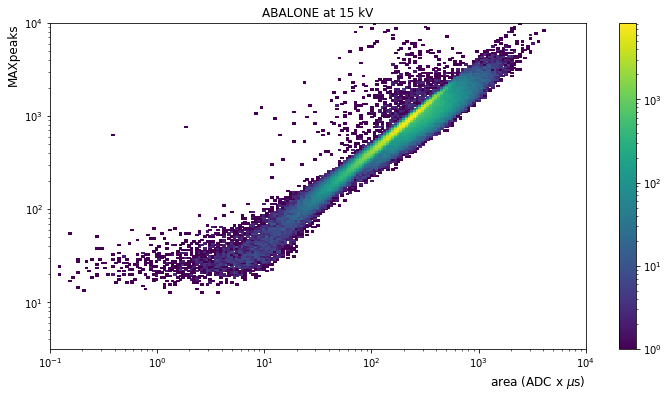

<Figure size 864x432 with 0 Axes>

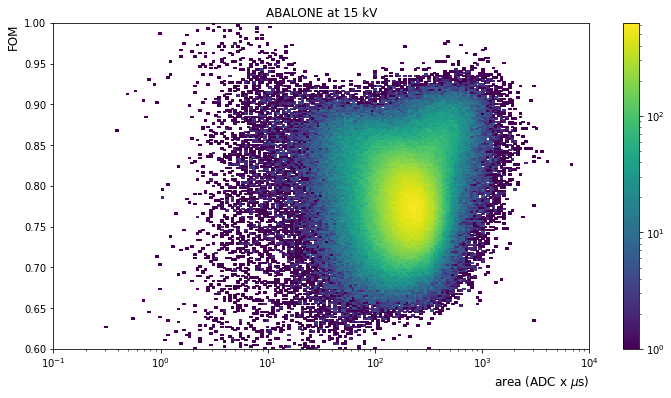

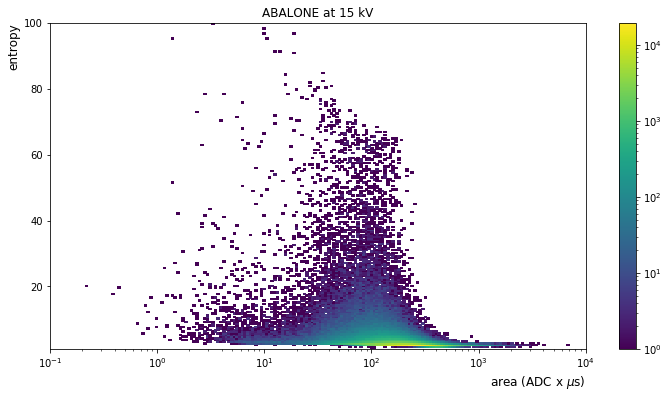

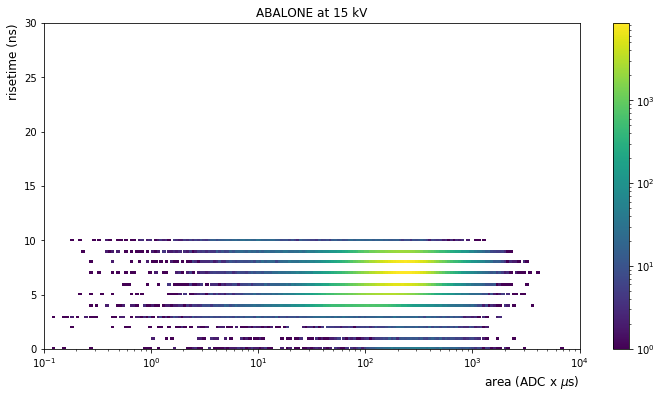

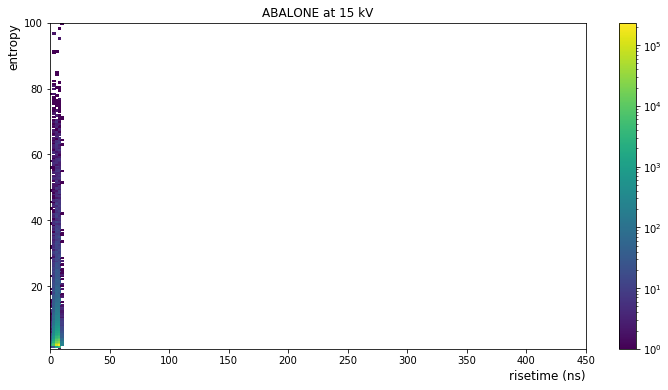

In [3]:
pau.plot_data(data=dataLED,fvolt=15,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_03_T1134_ABALONE_15kV_SiPM2_32V_LED500V.dat Number of events 595119.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 523 waveform samples 1024
Events rejected by areadown 523 -> 0.0878815833471961 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 1 waveform samples 1024
Events rejected by risetime 1 -> 0.00016803362016672296 %

n. events 37647 waveform samples 1024
Events rejected by max position 37647 -> 6.32596169841662 %

n. events 548027 waveform samples 1024
Events selected  548027 -> 92.08696075910868 %


<Figure size 864x432 with 0 Axes>

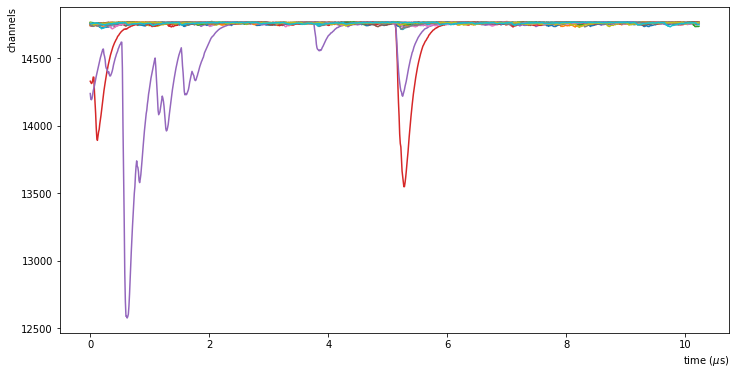

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

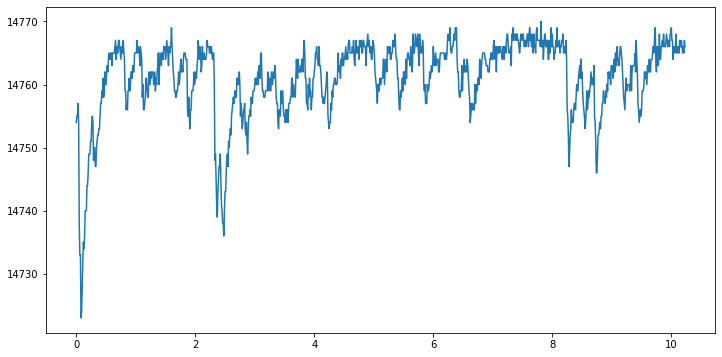

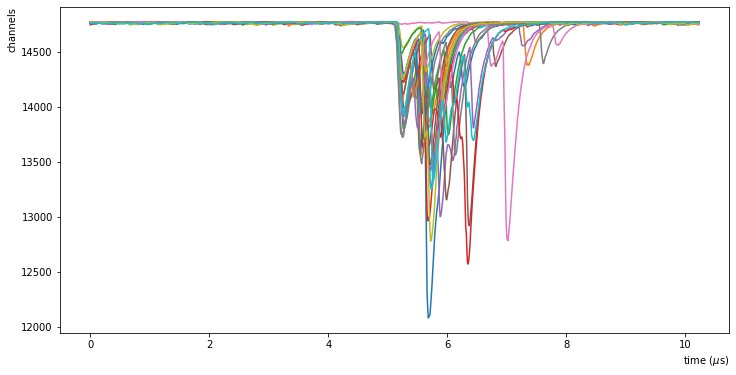

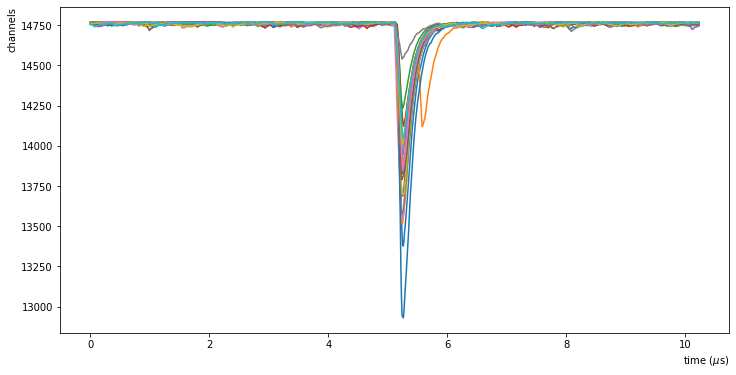

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,fvolt=15,entr_cut=200,
                                  max_cut=1,area_cut=(0,1e7), pos_cut=(500,550),rt_cut=0,events=20)

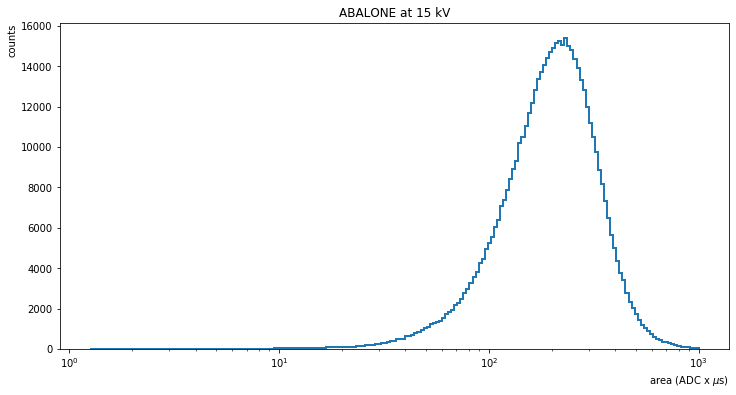

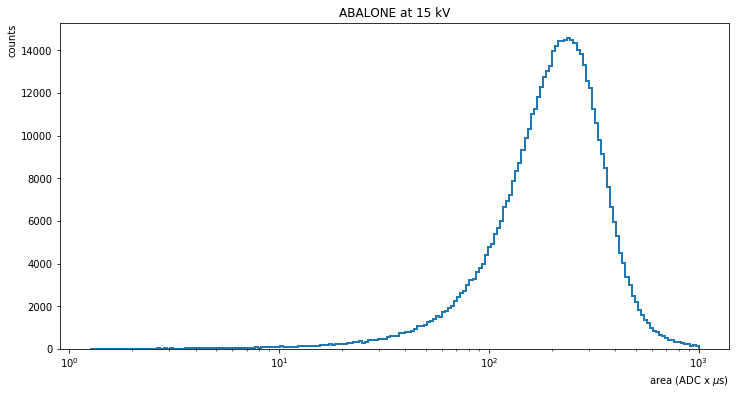

<Figure size 864x432 with 0 Axes>

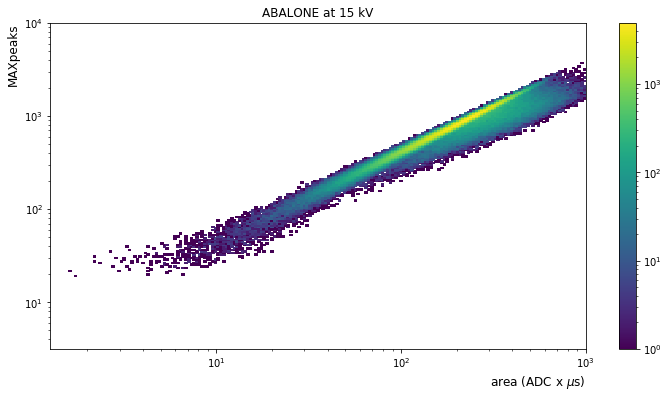

<Figure size 864x432 with 0 Axes>

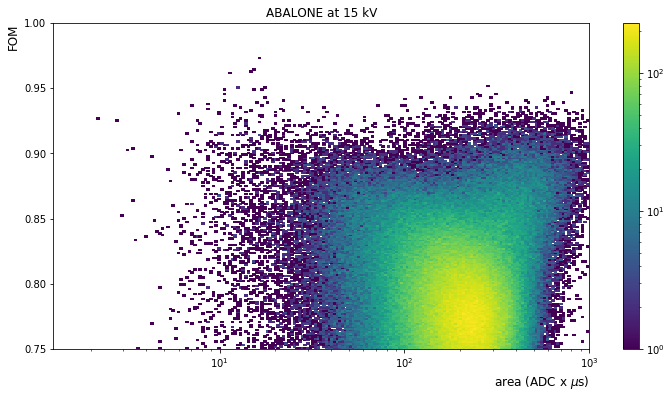

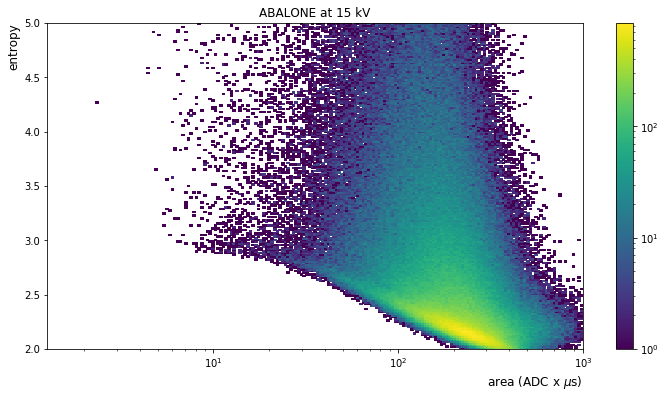

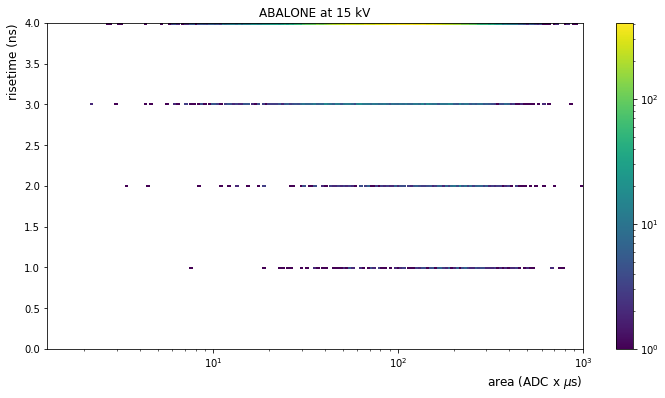

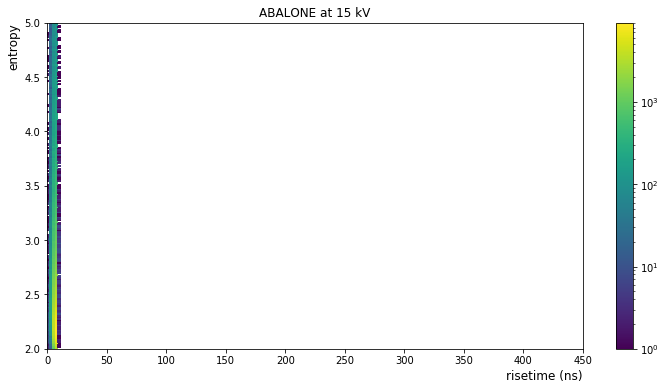

In [5]:
pau.plot_data(data=new_data,fvolt=15,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 15250 waveform samples 1024


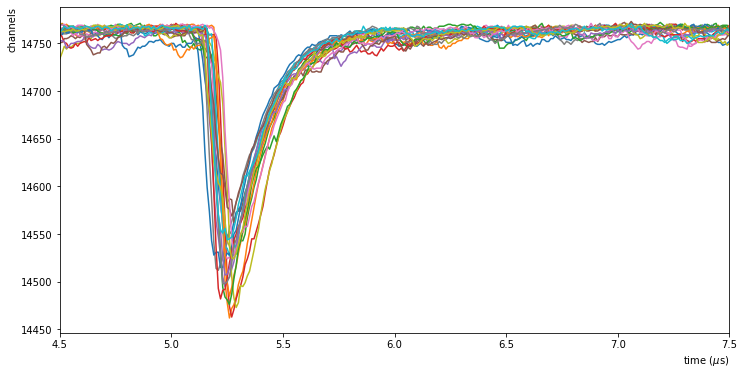

In [6]:
wf2 = new_wf[(new_data['area']>50)&(new_data['area']<70)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

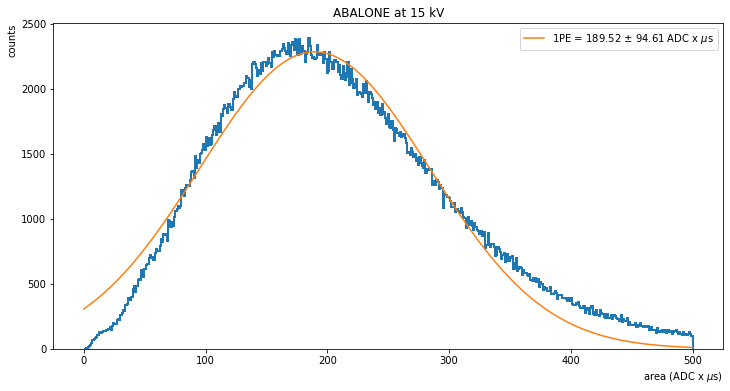

In [10]:
popt = pau.fit_pe_spectrum(new_data['area'],volts = 15,low=0, high=500, bins=500,fit_range=(20,400),dpe=0)

In [12]:
popt[1]/1.113

38.123021202926765

In [9]:
#peakint = np.load('processed_data/peakint_ABALONE_20kV_SiPM2_32V.npy')
peakint = pau.calculate_integrals( new_wf, nn = 0, volts = 15, sipmv = 32, plot = 0, save = 0 )

Total events: 167050
event n. 0 area: 6.29, time to process: 0.00
event n. 1000 area: 59.20, time to process: 6.02
event n. 2000 area: 39.07, time to process: 12.04
event n. 3000 area: 64.11, time to process: 17.89
event n. 4000 area: 5.33, time to process: 23.79
event n. 5000 area: 95.58, time to process: 29.66
event n. 6000 area: 61.35, time to process: 35.69
event n. 7000 area: 67.83, time to process: 41.80
event n. 8000 area: 48.59, time to process: 47.65
event n. 9000 area: 45.51, time to process: 53.89
event n. 10000 area: 33.00, time to process: 60.00
event n. 11000 area: 62.05, time to process: 65.94
event n. 12000 area: 71.65, time to process: 71.77
event n. 13000 area: 76.30, time to process: 77.76
event n. 14000 area: 127.12, time to process: 83.64
event n. 15000 area: 82.61, time to process: 89.49
event n. 16000 area: 83.91, time to process: 95.41
event n. 17000 area: 50.73, time to process: 101.51
event n. 18000 area: 12.22, time to process: 107.53
event n. 19000 area: 45.

event n. 157000 area: 43.74, time to process: 927.10
event n. 158000 area: 66.22, time to process: 932.66
event n. 159000 area: 69.62, time to process: 938.08
event n. 160000 area: 45.58, time to process: 943.57
event n. 161000 area: 57.63, time to process: 949.22
event n. 162000 area: 57.36, time to process: 954.90
event n. 163000 area: 180.26, time to process: 960.34
event n. 164000 area: 56.93, time to process: 965.96
event n. 165000 area: 44.83, time to process: 971.46
event n. 166000 area: 30.30, time to process: 976.88
event n. 167000 area: 95.28, time to process: 982.52


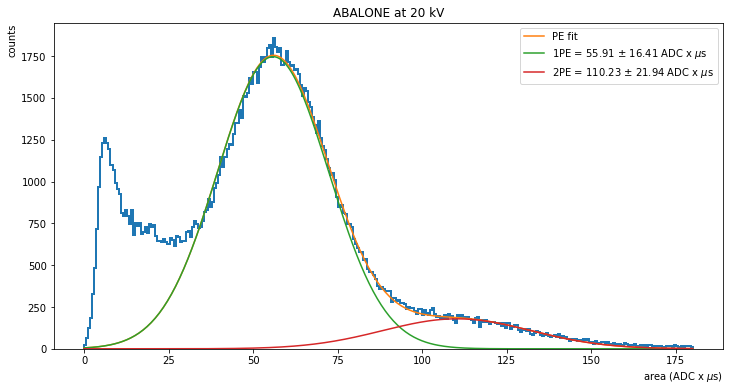

In [10]:
popt = pau.fit_pe_spectrum(peakint, volts = 20, low = 0, high = 180, bins = 300, fit_range=(30,170))

In [11]:
popt[1]/1.113

50.23418376329527